In [4]:
import sys
import os
src = os.path.dirname(os.path.abspath(''))
if src not in sys.path: sys.path.append(src)

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from src.db.database import connect
from src.config import FILTERED_FILE, SELECTED_REPOS_FILE

## 1 - What are the most popular programming languages in Data Science projects?
After filtering repositories that are likely courses we will analyze the remaning repositories we collected from Github.

In [6]:
filtered = pd.read_excel(FILTERED_FILE, keep_default_na=False)
print('Total of Repositories Filtered: ',len(filtered))

Total of Repositories Filtered:  130159


### 1.1 - Languages
In this section we will investigate the languages that are use in Data Science Projects

#### Number of Languages per Repository

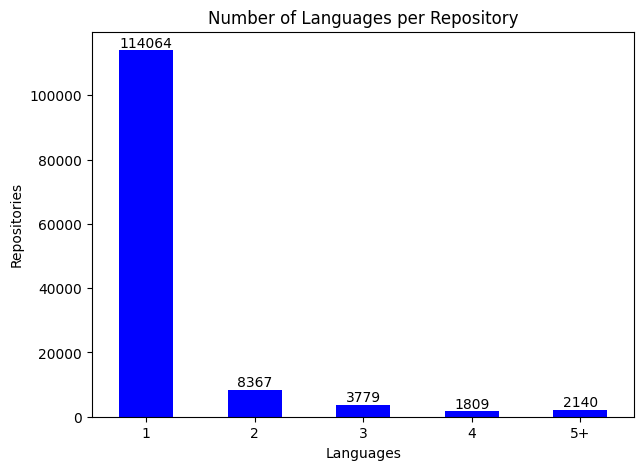

In [7]:
languages = filtered.languages\
    .value_counts(dropna=False, bins = [1,2, 3, 4, 5, 100])\
    .sort_index().to_frame("Repositories")

fig1, ax = plt.subplots( figsize=(7,5))
languages.plot.bar(title='Number of Languages per Repository', color='b', ax=ax,
                   xlabel='Languages', ylabel='Repositories').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2','3', '4', '5+'], rotation=0)
ax.bar_label(ax.containers[0], label_type='edge');

#### Most Popular Primary Language

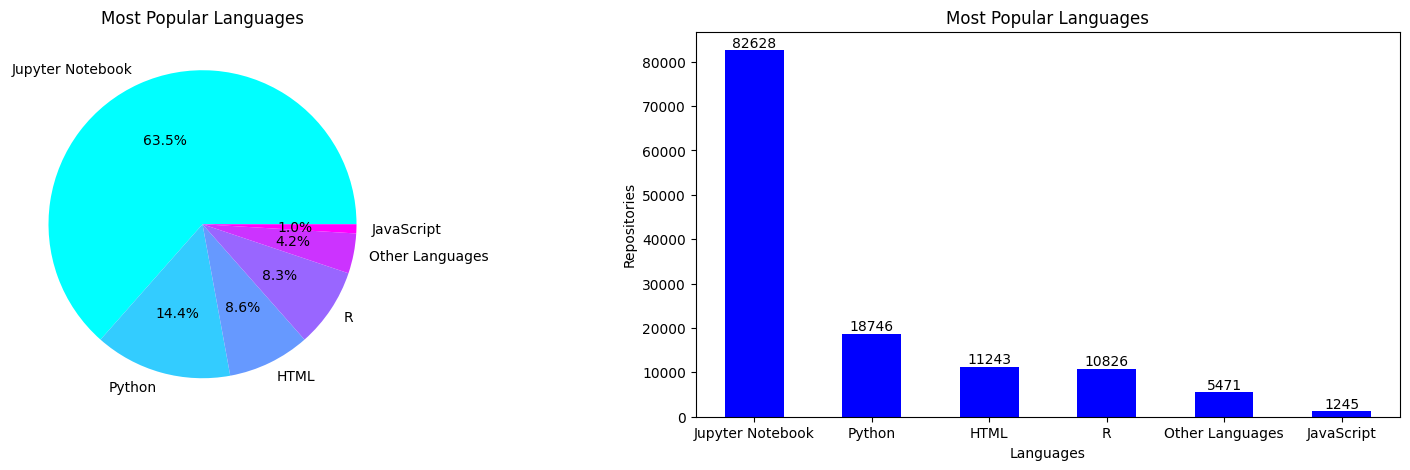

In [8]:
primary_languages = filtered.primaryLanguage\
    .value_counts(dropna=False)\
    .rename_axis('PrimaryLanguage').to_frame("Repositories")

pl = primary_languages[:5].reset_index(level=0)
others = pd.DataFrame(data = {
    'PrimaryLanguage' : ['Other Languages'],
    'Repositories' : [primary_languages['Repositories'][5:].sum()]
})

pl2 = pd.concat([pl,others]).reset_index(drop=True)\
    .sort_values(by='Repositories', ascending=False)

fig2, ax = plt.subplots(ncols=2, figsize=(20,5))
pl2.plot.pie(ax=ax[0], y="Repositories", title="Most Popular Languages",
             labels=pl2["PrimaryLanguage"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()
pl2.plot.bar(ax=ax[1], color="b", title="Most Popular Languages",
             xlabel='Languages', ylabel='Repositories',
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4,5],
           labels=pl2["PrimaryLanguage"], rotation=0)
ax[1].bar_label(ax[1].containers[0], label_type='edge');

### 1.2 - Respositories with Jupyter Notebooks and Python as Primary Language
Since Jupyter Notebook and Python are the most popular languages, we selected the repositories that have them as primary language for futher analysis.

In [9]:
selected = pd.read_excel(SELECTED_REPOS_FILE, keep_default_na=False)
print('Total of Repositories Selected: ', len(selected))

Total of Repositories Selected:  10


In [10]:
with connect() as session:
    notebooks = pd.read_sql_table("notebooks", session.connection())
    python_files = pd.read_sql_table("python_files", session.connection())

print(f'Out of the {len(selected)} selected repositories we found:')
print('- A total of Notebooks:', len(notebooks))
print('- A total of Python Files:', len(python_files))

Out of the 10 selected repositories we found:
- A total of Notebooks: 389
- A total of Python Files: 215


#### 1.2.1 - Jupyter Notebooks
 Which languages are they in? Which versions?

Out of 389 Notebooks:
- Python Notebooks: 364
- R Notebooks: 24
- Unkwon language Notebooks: 1


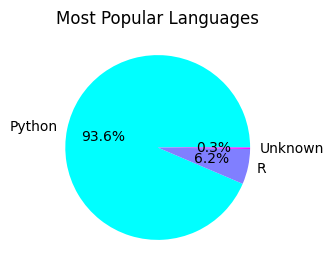

In [11]:
fig3, ax = plt.subplots( figsize=(3,3))
languages = notebooks.language\
    .value_counts(dropna=False)\
    .rename_axis('PrimaryLanguage')\
    .to_frame("Notebooks").reset_index(drop=False)\
    .sort_values(by='Notebooks', ascending=False)
languages.plot.pie(ax=ax, y="Notebooks", title="Most Popular Languages",
             labels=["Python","R","Unknown"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()

print(f"Out of {len(notebooks)} Notebooks:")
print('- Python Notebooks:', languages["Notebooks"][0])
print('- R Notebooks:', languages["Notebooks"][1])
print('- Unkwon language Notebooks:', languages["Notebooks"][2])

Since most notebooks are in Python, henceforth we will only analyze those in Python

In [12]:
python_notebooks = notebooks.query("language == 'python'")

In [23]:
python_notebooks['minor_version'] = python_notebooks.loc[:,['language_version']]

/tmp/ipykernel_1761/1473379303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_notebooks['minor_version'] = python_notebooks.loc[:,['language_version']]


In [24]:
display(python_notebooks)

,id,repository_id,name,nbformat,kernel,language,language_version,max_execution_count,total_cells,code_cells,code_cells_with_output,markdown_cells,raw_cells,unknown_cell_formats,empty_cells,processed,skip,minor_version
0,1.0,1.0,notebooks/05.09-Principal-Component-Analysis.i...,4.0,python3,python,3.5.1,22.0,61.0,22.0,15.0,39.0,0.0,0.0,0.0,32.0,0.0,3.5.1
1,2.0,1.0,notebooks/01.05-IPython-And-Shell-Commands.ipynb,4.0,python3,python,3.5.1,-1.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,32.0,0.0,3.5.1
2,3.0,1.0,notebooks/03.13-Further-Resources.ipynb,4.0,python3,python,3.5.1,-1.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,32.0,0.0,3.5.1
3,4.0,1.0,notebooks/03.12-Performance-Eval-and-Query.ipynb,4.0,python3,python,3.5.1,28.0,66.0,28.0,18.0,38.0,0.0,0.0,0.0,32.0,0.0,3.5.1
4,5.0,1.0,notebooks/01.02-Shell-Keyboard-Shortcuts.ipynb,4.0,python3,python,3.5.1,-1.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,32.0,0.0,3.5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386.0,9.0,resources/tutorials/tutorials/jupyter-basics-t...,4.1,python3,python,3.6.8,-1.0,129.0,42.0,0.0,87.0,0.0,0.0,0.0,32.0,0.0,3.6.8
386,387.0,9.0,resources/tests/test-tool-installers.ipynb,4.4,python3,python,3.7.6,-1.0,11.0,5.0,0.0,6.0,0.0,0.0,0.0,32.0,0.0,3.7.6
387,388.0,9.0,resources/tests/evaluate-py-libraries.ipynb,4.2,python3,python,3.8.5,-1.0,41.0,20.0,0.0,21.0,0.0,0.0,1.0,32.0,0.0,3.8.5
388,389.0,10.0,assets/bag-rf-var.ipynb,4.0,python2,python,2.7.9,5.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,64.0,0.0,2.7.9


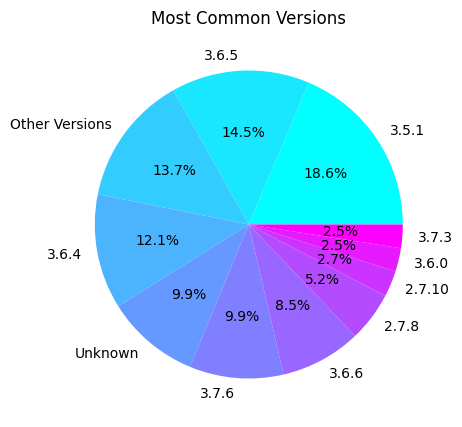

In [15]:
fig4, ax = plt.subplots( figsize=(20,5))
python_version = python_notebooks.language_version\
    .value_counts(dropna=False)\
    .rename_axis('Versions')\
    .to_frame("Notebooks")

pv = python_version[:10].reset_index(level=0)
others = pd.DataFrame(data = {
    'Versions' : ['Other Versions'],
    'Notebooks' : [python_version['Notebooks'][10:].sum()]
})

pv2 = pd.concat([pv,others]).reset_index(drop=True)\
    .sort_values(by='Notebooks', ascending=False)
unknown = pv2.query("Versions=='unknown'")
if not unknown.empty:
    index = unknown.index[0]
    pv2.at[index, "Versions"]='Unknown'
pv2.plot.pie(ax=ax, y="Notebooks", title="Most Common Versions",
             labels=pv2["Versions"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()

In [16]:
with connect() as session:
    query = (
        "SELECT count(id) FROM notebooks "
        "WHERE NOT (kernel = 'no-kernel' AND nbformat = '0') "
        "AND language = 'python' "
        "AND language_version != 'unknown' "
        "AND total_cells != 0 "
        "AND processed & 16 = 0 "
    )
    result = session.execute(query)
    total_valid_python_notebooks = result.scalar()

    print(f'Out of the {len(notebooks)} Notebooks:')
    print(f'- Valid Python Notebooks: {total_valid_python_notebooks}')
    print(f'- Invalid Python Notebooks: {len(notebooks)-total_valid_python_notebooks}')

Out of the 389 Notebooks:
- Valid Python Notebooks: 314
- Invalid Python Notebooks: 75
